## Load workspace

In [2]:
#save.image(file = "DESeq2_notebook.RData")
load("DESeq2_notebook.RData")

## Load libraries

In [3]:
suppressPackageStartupMessages({library(Rsubread)
                                library(DESeq2)
                                library("dplyr")
                                library("ggplot2")
                                library("pheatmap")
                                library("RColorBrewer")
                                library(AnnotationDbi)
                                library(org.Dr.eg.db)
                                library(repr)
                                library(topGO)
                                library(GOstats)
                               })

library(GOstats)


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.



In [15]:
# set size of plot windows
options(repr.plot.width=12, repr.plot.height=10)

Did not remove duplicated reads although there are UMIs general advice from Anika is that these haven't been useful in bulk as they saturate quickly. #may check eventually if this is the case here when we have low read recover.
Reads were mapped to danrer11 with STAR.
Here following the RNA-seq workflow from bioconductor: https://www.bioconductor.org/packages/devel/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html

## Rsubread
First create count matrix with Rsubread: https://bioconductor.org/packages/3.12/bioc/vignettes/Rsubread/inst/doc/Rsubread.pdf

ThefeatureCountsfunction  is  a  general-purpose  read  summarization  function  thatassigns mapped reads (RNA-seq or gDNA-seq reads) to genomic features such as genes,exons, promoters, gene bodies and genomic windows.This function takes as input a set of files that contain read mapping results and anannotation file that includes genomic features.  It automatically detects the format ofinput read files (supported formats include SAM and BAM). Input reads can be name-sorted or location-sorted.  Users do not need to resort the reads before feeding them to featureCounts.

In [2]:
#?list.files
bamfiles<-list.files(path= "/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped", pattern= "*/*.Aligned.out.bam", full.names=TRUE, recursive=TRUE)

In [3]:
#bamfiles

In [4]:
mycounts <- featureCounts(bamfiles, annot.ext="/fast/AG_Ohler/Alison/reference_genomes/danrer11/Danio_rerio.GRCz11.100.gtf", isGTFAnnotationFile=TRUE, isPairedEnd=FALSE, countMultiMappingReads = FALSE)


        ==========     _____ _    _ ____  _____  ______          _____  
        =====         / ____| |  | |  _ \|  __ \|  ____|   /\   |  __ \ 
          =====      | (___ | |  | | |_) | |__) | |__     /  \  | |  | |
            ====      \___ \| |  | |  _ <|  _  /|  __|   / /\ \ | |  | |
              ====    ____) | |__| | |_) | | \ \| |____ / ____ \| |__| |
        ==========   |_____/ \____/|____/|_|  \_\______/_/    \_\_____/
       Rsubread 2.2.2

//========================== featureCounts setting ===========================\\
||                                                                            ||
||             Input files : 22 BAM files                                     ||
||                           o sample1.Aligned.out.bam                        ||
||                           o sample10.Aligned.out.bam                       ||
||                           o sample12.Aligned.out.bam                       ||
||                           o sample14.Aligned.out.b

In [7]:
#summary(mycounts)
#dim(mycounts$counts)
#head(mycounts$annotation)
#mycounts$targets
#mycounts$stat

## Import count matrix into DESeq2
Now import count matrix into DESeq2 with DESeqDataSetFromMatrix (see 3.2 Starting from count matrices)
Batches were given by Anne Merks. Could be divided based on embryonic clutches but this is unbalanced for the second expt because different embryonic lines were used, and also when the experiment was performed.
Experiment batches won't be used for selection of DE genes so can't be included in design formula. Decide whether it is better to analyse them separately or all together (first inclination is together, to allow more borrowed information).

In [5]:
countData<-mycounts$counts
colData<-read.csv("/fast/AG_Ohler/Alison/panakova_CM_RNAseq/mapped_samplesheet_batches.txt", sep="\t", header=TRUE)
colData

path,samplename,condition,embryo_batch,expt_batch
<chr>,<chr>,<chr>,<chr>,<chr>
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample1/sample1.Aligned.out.bam,sample1,dmso,bleb_expt_batch1,bleb_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample10/sample10.Aligned.out.bam,sample10,bleb,bleb_expt_batch1,bleb_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample12/sample12.Aligned.out.bam,sample12,bleb,bleb_expt_batch1,bleb_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample14/sample14.Aligned.out.bam,sample14,wt,vangl2_expt_batch1,vangl2_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample15/sample15.Aligned.out.bam,sample15,wt,vangl2_expt_batch1,vangl2_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample16/sample16.Aligned.out.bam,sample16,wt,vangl2_expt_batch1,vangl2_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample17/sample17.Aligned.out.bam,sample17,wt,vangl2_expt_batch1,vangl2_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample18/sample18.Aligned.out.bam,sample18,wt,vangl2_expt_batch1,vangl2_expt
/fast/AG_Ohler/Alison/panakova_CM_RNAseq/data/mapped/sample19/sample19.Aligned.out.bam,sample19,vangl2,vangl2_expt_batch2,vangl2_expt


In [31]:
dds <- DESeqDataSetFromMatrix(countData = countData,
                                 colData = colData,
                                 design = ~ condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


## Exploratory analysis and visualization

### Prefiltering the dataset
Removing rows with no counts or only a single count across all samples.
NB may come back and adjust this

In [32]:
nrow(dds)

[1] 32520

In [33]:
keep <- rowSums(counts(dds)) > 1
# at least 3 samples with a count of 10 or higher
#keep <- rowSums(counts(dds) >= 1) >= 3
dds <- dds[keep,]
nrow(dds)

[1] 23315

### select samples with significant counts
Without any filtering of samples with low counts - samples 2, 5, 23, 3, 9, 14, 21, 22 cluster separately.

In [34]:
colSums(counts(dds))

sample1.Aligned.out.bam sample10.Aligned.out.bam sample12.Aligned.out.bam 
                  853537                  1754891                  2331661 
sample14.Aligned.out.bam sample15.Aligned.out.bam sample16.Aligned.out.bam 
                   23112                  1845252                   436058 
sample17.Aligned.out.bam sample18.Aligned.out.bam sample19.Aligned.out.bam 
                 1782547                  1463718                   695786 
 sample2.Aligned.out.bam sample20.Aligned.out.bam sample21.Aligned.out.bam 
                  102066                  1427380                      967 
sample22.Aligned.out.bam sample23.Aligned.out.bam sample24.Aligned.out.bam 
                     627                     6175                  1072944 
 sample3.Aligned.out.bam  sample4.Aligned.out.bam  sample5.Aligned.out.bam 
                    8557                   670858                     8005 
 sample6.Aligned.out.bam  sample7.Aligned.out.bam  sample8.Aligned.out.bam 
                 1457023                  1736465                  1079949 
 sample9.Aligned.out.bam 
                   13299

In [35]:
colSums(counts(dds[,colSums(counts(dds)) < 150000]))

sample14.Aligned.out.bam  sample2.Aligned.out.bam sample21.Aligned.out.bam 
                   23112                   102066                      967 
sample22.Aligned.out.bam sample23.Aligned.out.bam  sample3.Aligned.out.bam 
                     627                     6175                     8557 
 sample5.Aligned.out.bam  sample9.Aligned.out.bam 
                    8005                    13299

The above samples that clustered separately all have low readcounts, and very poor general QC, such as read quality etc. If I don't remove these samples with low counts, I only see 129 bled vs dmso genes and 1 vangl2 vs wt gene

In [52]:
keep2 <- colSums(counts(dds)) > 150000
dds <- dds[,keep2]
ncol(dds)

[1] 14

Sample 19 should also be removed. It was one of the non-standard barcodes that had one basepair mismatch with sample19's expected barcoed. However the read quality is poor, and it clusters with the dmso samples rather than the vangl samples so it should be removed as it may introduce erronious DE genes.

In [9]:
keep3 <- colnames(dds) != "sample19.Aligned.out.bam"
keep3
dds <- dds[,keep3]
ncol(dds)

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
[13]  TRUE  TRUE

[1] 13

##  The variance stabilizing transformation and the rlog

Normalization here is aimed to stabilise the variance across the mean, for the purposes of plotting. If you just take counts, the largest counts have the highest absolute variance. If you take log2+1 of counts, the smaller counts will be over-represented in the variance.
DESeq2 has two methods to deal with this now - VST and rlog.
The rlog tends to work well on small datasets (n < 30), potentially outperforming the VST when there is a wide range of sequencing depth across samples (an order of magnitude difference).
=> Use rlog here, but it takes longer to compute

In [18]:
vsd <- vst(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(vsd), 3)

,sample1.Aligned.out.bam,sample10.Aligned.out.bam,sample12.Aligned.out.bam,sample15.Aligned.out.bam,sample16.Aligned.out.bam,sample17.Aligned.out.bam,sample18.Aligned.out.bam,sample20.Aligned.out.bam,sample24.Aligned.out.bam,sample4.Aligned.out.bam,sample6.Aligned.out.bam,sample7.Aligned.out.bam,sample8.Aligned.out.bam
ENSDARG00000114503,5.495082,5.495082,5.495082,5.495082,5.495082,5.495082,5.495082,5.495082,5.495082,5.772698,5.697357,5.495082,5.495082
ENSDARG00000115971,5.495082,5.676935,5.650580,5.495082,5.495082,5.495082,5.495082,5.689027,5.495082,5.495082,5.495082,5.495082,5.495082
ENSDARG00000098311,5.734195,5.676935,5.495082,5.795730,5.495082,5.734136,5.685284,5.689027,5.495082,5.495082,5.495082,5.495082,5.495082


In [19]:
rld <- rlog(dds, blind = FALSE) # can try blind=TRUE for completely unsupervised
head(assay(rld), 3)

,sample1.Aligned.out.bam,sample10.Aligned.out.bam,sample12.Aligned.out.bam,sample15.Aligned.out.bam,sample16.Aligned.out.bam,sample17.Aligned.out.bam,sample18.Aligned.out.bam,sample20.Aligned.out.bam,sample24.Aligned.out.bam,sample4.Aligned.out.bam,sample6.Aligned.out.bam,sample7.Aligned.out.bam,sample8.Aligned.out.bam
ENSDARG00000114503,-2.0926668,-2.1050791,-2.1121739,-2.1071349,-2.0788731,-2.1083655,-2.103045,-2.1021611,-2.0963307,-2.0406262,-2.0549901,-2.1039659,-2.091457
ENSDARG00000115971,-1.8784133,-1.8509928,-1.8577585,-1.8904894,-1.8669001,-1.8915165,-1.887075,-1.8485572,-1.8814715,-1.8727575,-1.8847466,-1.8878443,-1.877404
ENSDARG00000098311,-0.7659063,-0.8017242,-0.8731723,-0.6922526,-0.8290535,-0.7533775,-0.796085,-0.7935716,-0.8628891,-0.8431345,-0.8657116,-0.8682261,-0.854304


Warning message:
“`as_data_frame()` is deprecated as of tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


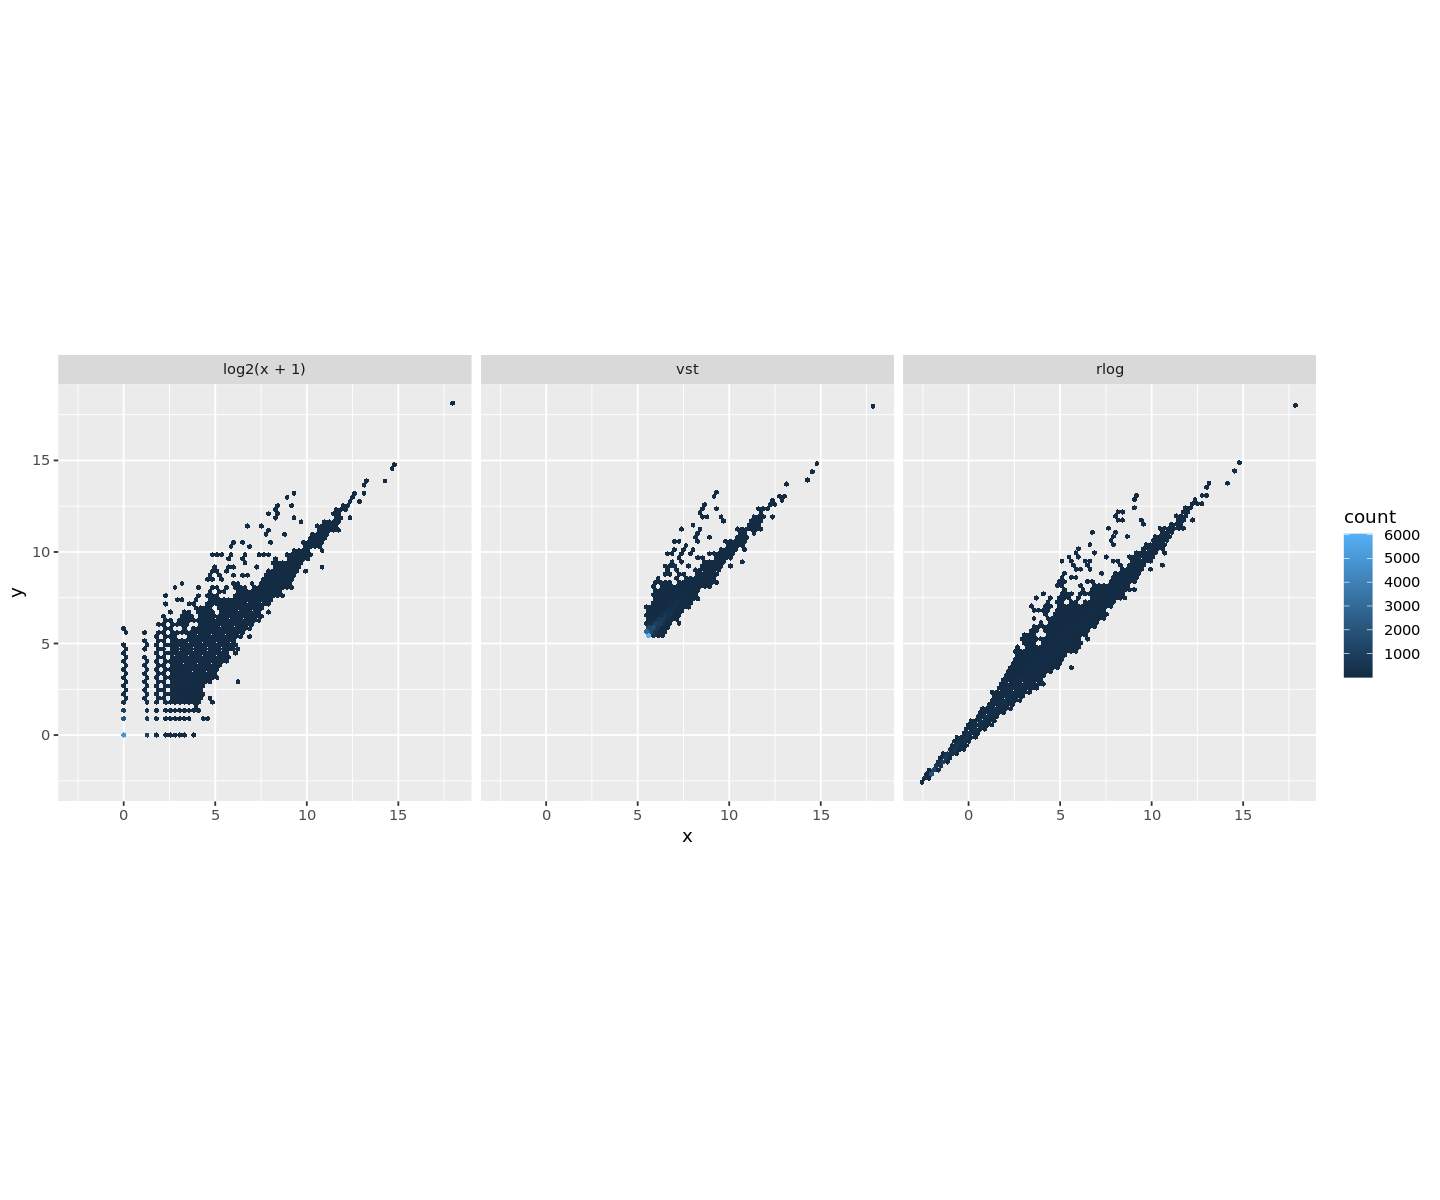

In [16]:
library("dplyr")
library("ggplot2")

dds <- estimateSizeFactors(dds)

df <- bind_rows(
  as_data_frame(log2(counts(dds, normalized=TRUE)[, 1:2]+1)) %>%
         mutate(transformation = "log2(x + 1)"),
  as_data_frame(assay(vsd)[, 1:2]) %>% mutate(transformation = "vst"),
  as_data_frame(assay(rld)[, 1:2]) %>% mutate(transformation = "rlog"))
  
colnames(df)[1:2] <- c("x", "y")  

lvls <- c("log2(x + 1)", "vst", "rlog")
df$transformation <- factor(df$transformation, levels=lvls)

ggplot(df, aes(x = x, y = y)) + geom_hex(bins = 80) +
  coord_fixed() + facet_grid( . ~ transformation)  

In [21]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists

In [22]:
library("pheatmap")
library("RColorBrewer")

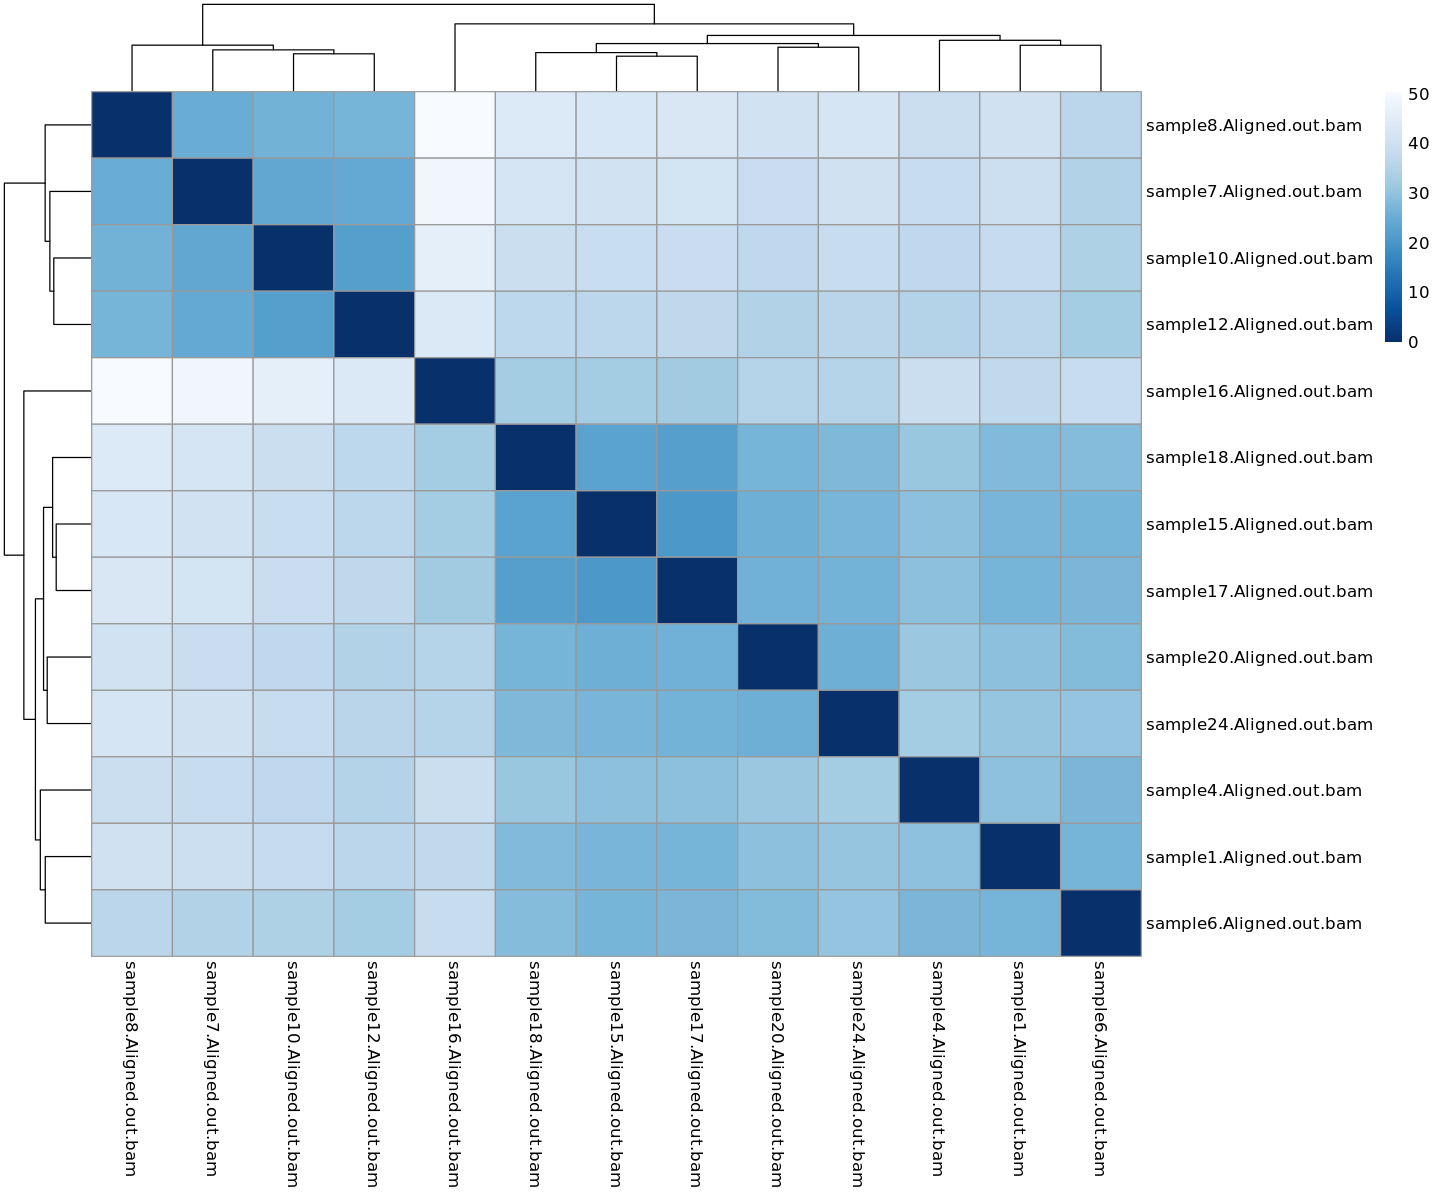

In [17]:
sampleDistMatrix <- as.matrix( sampleDists )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors)

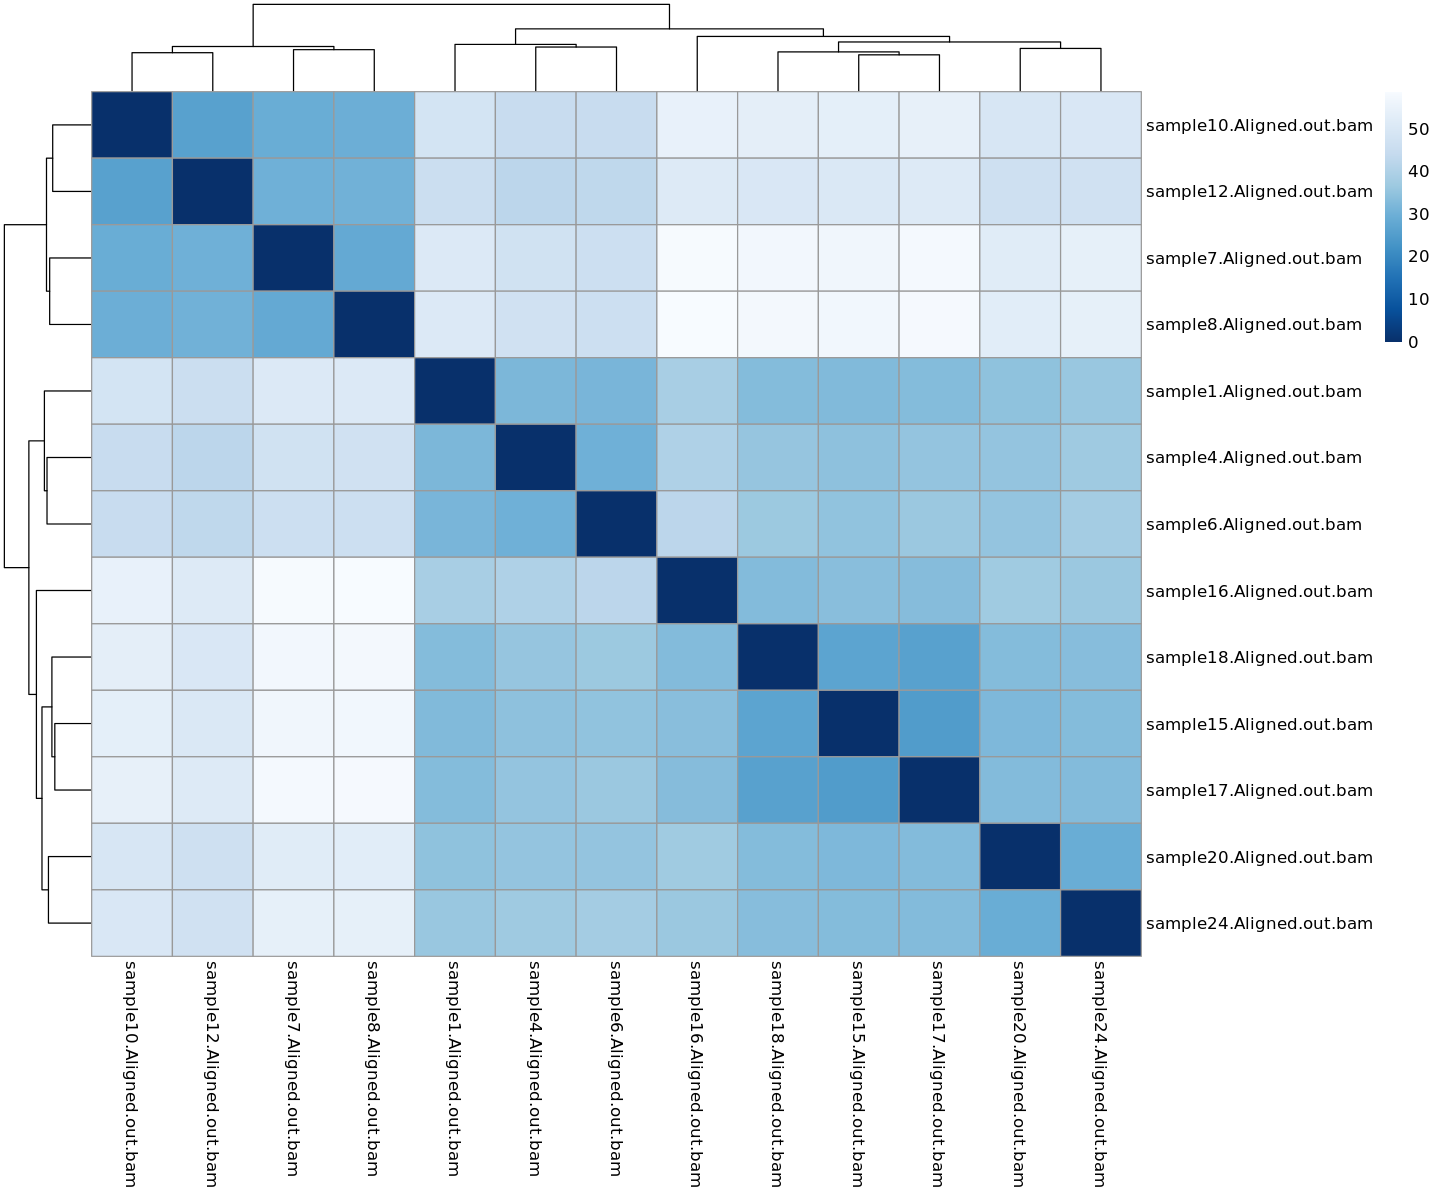

In [18]:
sampleDists_rld <- dist(t(assay(rld)))
sampleDistMatrix_rld <- as.matrix( sampleDists_rld )
#rownames(sampleDistMatrix) <- paste( vsd$dex, vsd$cell, sep = " - " )
#colnames(sampleDistMatrix) <- NULL
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
pheatmap(sampleDistMatrix_rld,
         clustering_distance_rows = sampleDists_rld,
         clustering_distance_cols = sampleDists_rld,
         col = colors)

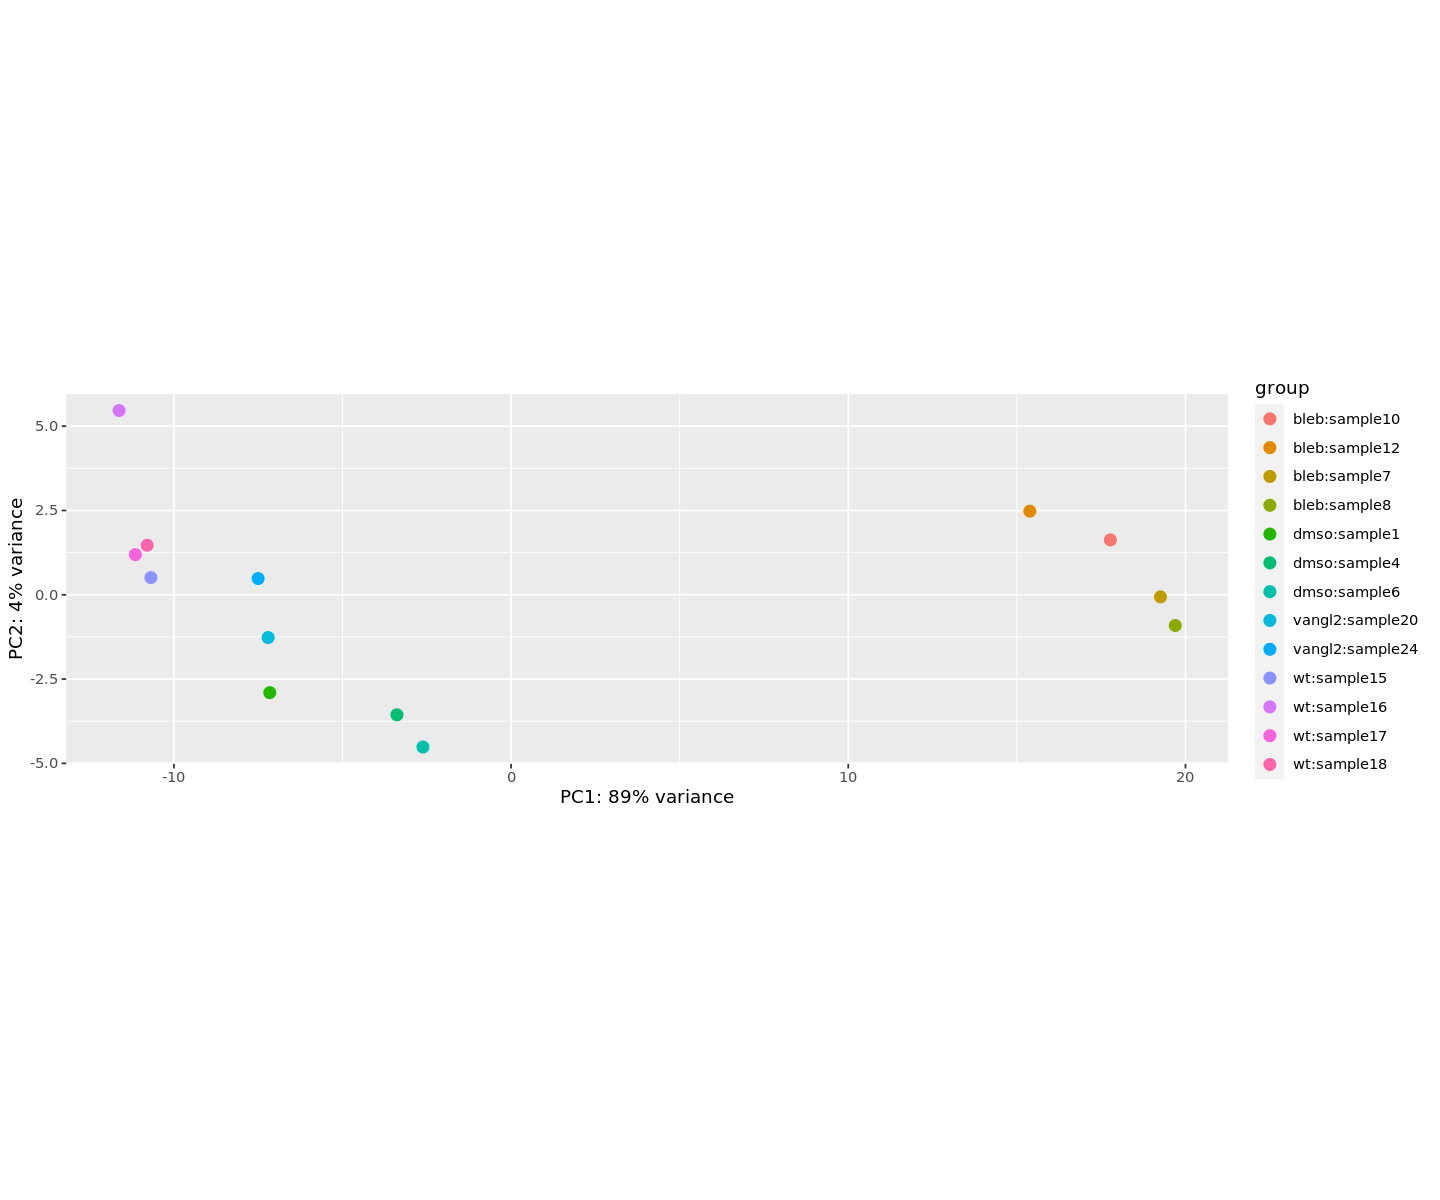

In [19]:
plotPCA(vsd, intgroup=c("condition","samplename"))
# add sample names

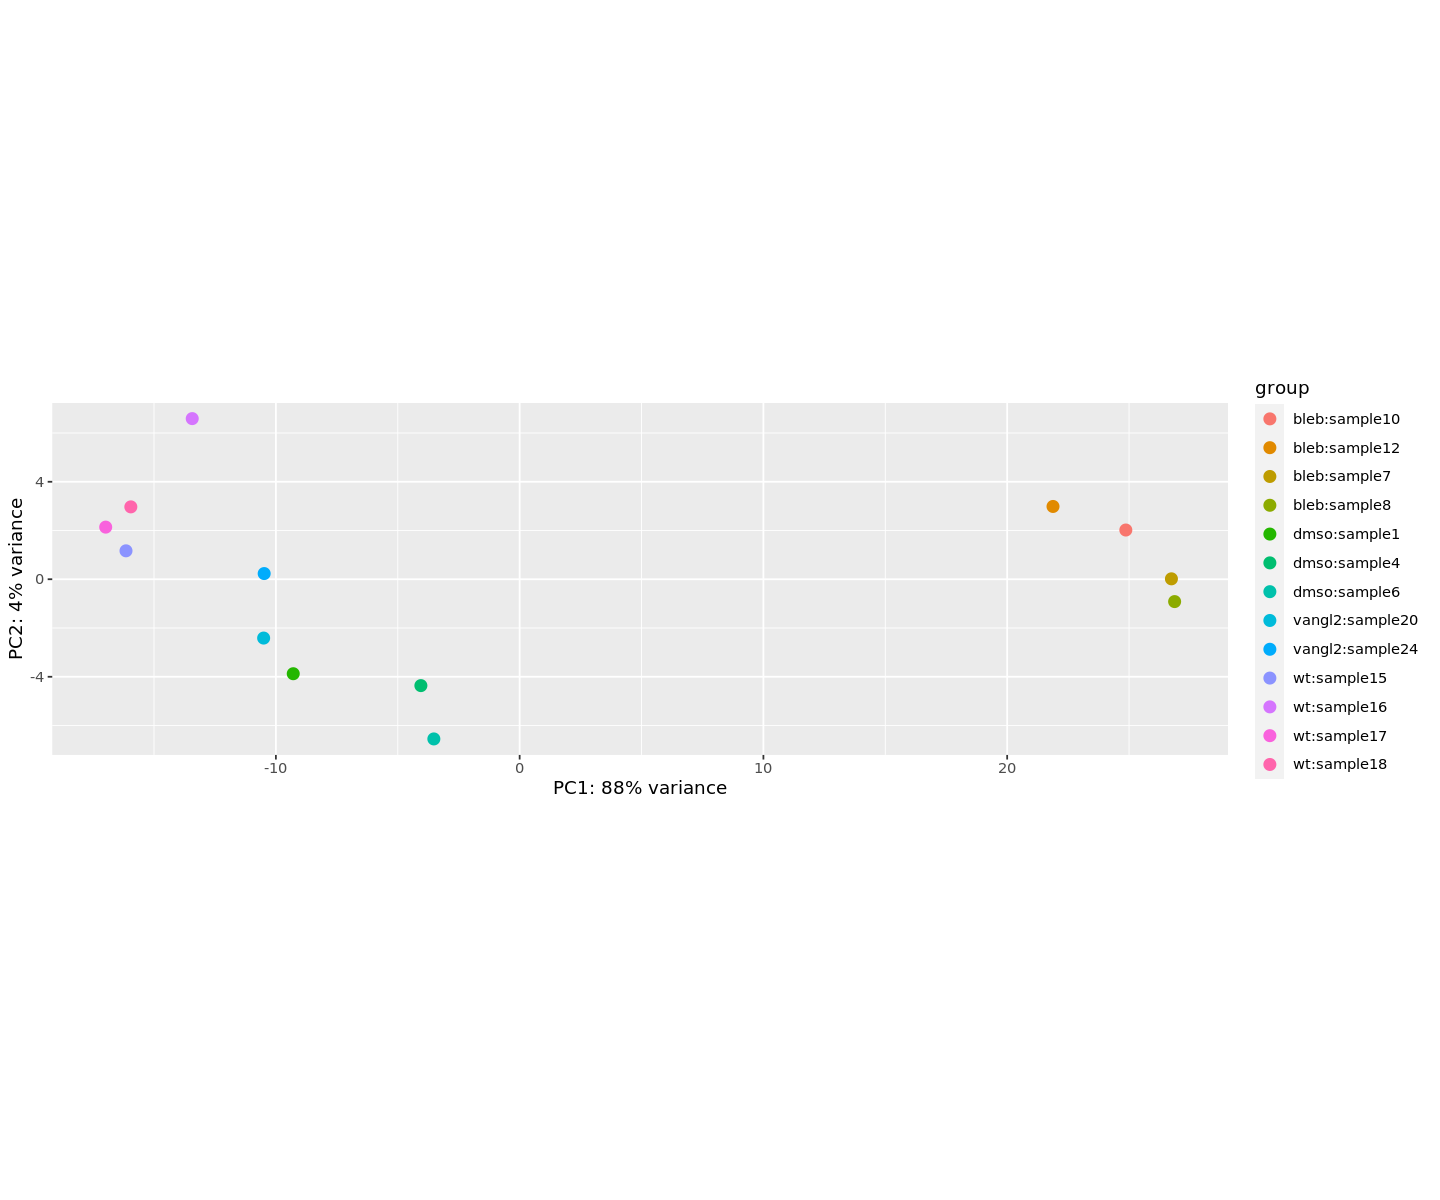

In [20]:
plotPCA(rld, intgroup=c("condition","samplename"))

## Differential expression analysis
As we have already specified an experimental design when we created the DESeqDataSet, we can run the differential expression pipeline on the raw counts with a single call to the function DESeq:

This function will print out a message for the various steps it performs. These are described in more detail in the manual page for DESeq, which can be accessed by typing ?DESeq. Briefly these are: the estimation of size factors (controlling for differences in the sequencing depth of the samples), the estimation of dispersion values for each gene, and fitting a generalized linear model.

A DESeqDataSet is returned that contains all the fitted parameters within it, and the following section describes how to extract out results tables of interest from this object.

In [27]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [28]:
res <- results(dds, contrast=c("condition","bleb","dmso"))
res

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 23315 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat    pvalue
                   <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSDARG00000114503  0.207013      -2.560846  4.202266 -0.609396 0.5422617
ENSDARG00000115971  0.165956       0.701608  4.048641  0.173295 0.8624198
ENSDARG00000098311  0.546113      -0.895955  2.248082 -0.398542 0.6902309
ENSDARG00000104839  0.863968      -2.099540  1.990889 -1.054574 0.2916202
ENSDARG00000102474 45.743681       0.590385  0.265544  2.223306 0.0261952
...                      ...            ...       ...       ...       ...
ENSDARG00000104316  51.46951      0.0448095  0.236583  0.189403  0.849777
ENSDARG00000115161   2.68150      1.7586787  1.291203  1.362046  0.173183
ENSDARG00000113284   4.39966      0.1864568  0.814132  0.229025  0.818849
ENSDARG00000103580   1.90392      0.9242396  1.587019  

### select significant genes between bleb and dmso
If I don't remove samples with low counts I only get 129 diff genes

In [29]:
sum(res$padj < 0.1, na.rm=TRUE)

[1] 991

In [30]:
resSig <- subset(res, padj < 0.1)
head(resSig[ order(-resSig$log2FoldChange), ])

log2 fold change (MLE): condition bleb vs dmso 
Wald test p-value: condition bleb vs dmso 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000046079   5.34643        5.91692  1.374971   4.30331 1.68269e-05
ENSDARG00000018264  11.27229        5.11122  1.085205   4.70991 2.47831e-06
ENSDARG00000045633   3.66119        4.55850  1.354222   3.36614 7.62291e-04
ENSDARG00000059003   3.76983        4.30006  1.330808   3.23116 1.23288e-03
ENSDARG00000033854   5.15455        4.10980  1.148516   3.57836 3.45756e-04
ENSDARG00000034307   7.80524        4.08311  0.948672   4.30403 1.67722e-05
                          padj
                     <numeric>
ENSDARG00000046079 4.47797e-04
ENSDARG00000018264 8.38151e-05
ENSDARG00000045633 1.28012e-02
ENSDARG00000059003 1.89405e-02
ENSDARG00000033854 6.55188e-03
ENSDARG00000034307 4.47564e-04

annotate genes with gene names

In [31]:
library(AnnotationDbi)
library(org.Dr.eg.db)

In [32]:
columns(org.Dr.eg.db)

[1] "ACCNUM"       "ALIAS"        "ENSEMBL"      "ENSEMBLPROT"  "ENSEMBLTRANS"
 [6] "ENTREZID"     "ENZYME"       "EVIDENCE"     "EVIDENCEALL"  "GENENAME"    
[11] "GO"           "GOALL"        "IPI"          "ONTOLOGY"     "ONTOLOGYALL" 
[16] "PATH"         "PFAM"         "PMID"         "PROSITE"      "REFSEQ"      
[21] "SYMBOL"       "UNIGENE"      "UNIPROT"      "ZFIN"

In [33]:
#ens.str <- substr(rownames(res), 1)
ens.str <- substr(rownames(res), 1, length(rownames(res)))
res$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [34]:
#ens.str <- substr(rownames(res), 1, length(rownames(res)))
resSig <- subset(res, padj < 0.1)


### plot heat maps with top and bottom DE genes

In [35]:
#select top and bottom most differential genes
topBotDEGenes<-rbind(head(resSig[ order(-resSig$log2FoldChange), ], 15),
                       head(resSig[ order(resSig$log2FoldChange), ], 15))
#head(topBotDEGenes, 20)

In [36]:
# select blab and dmso samples
blebdmso_samples<-colData(vsd)[vsd$condition == "bleb" | vsd$condition == "dmso",]

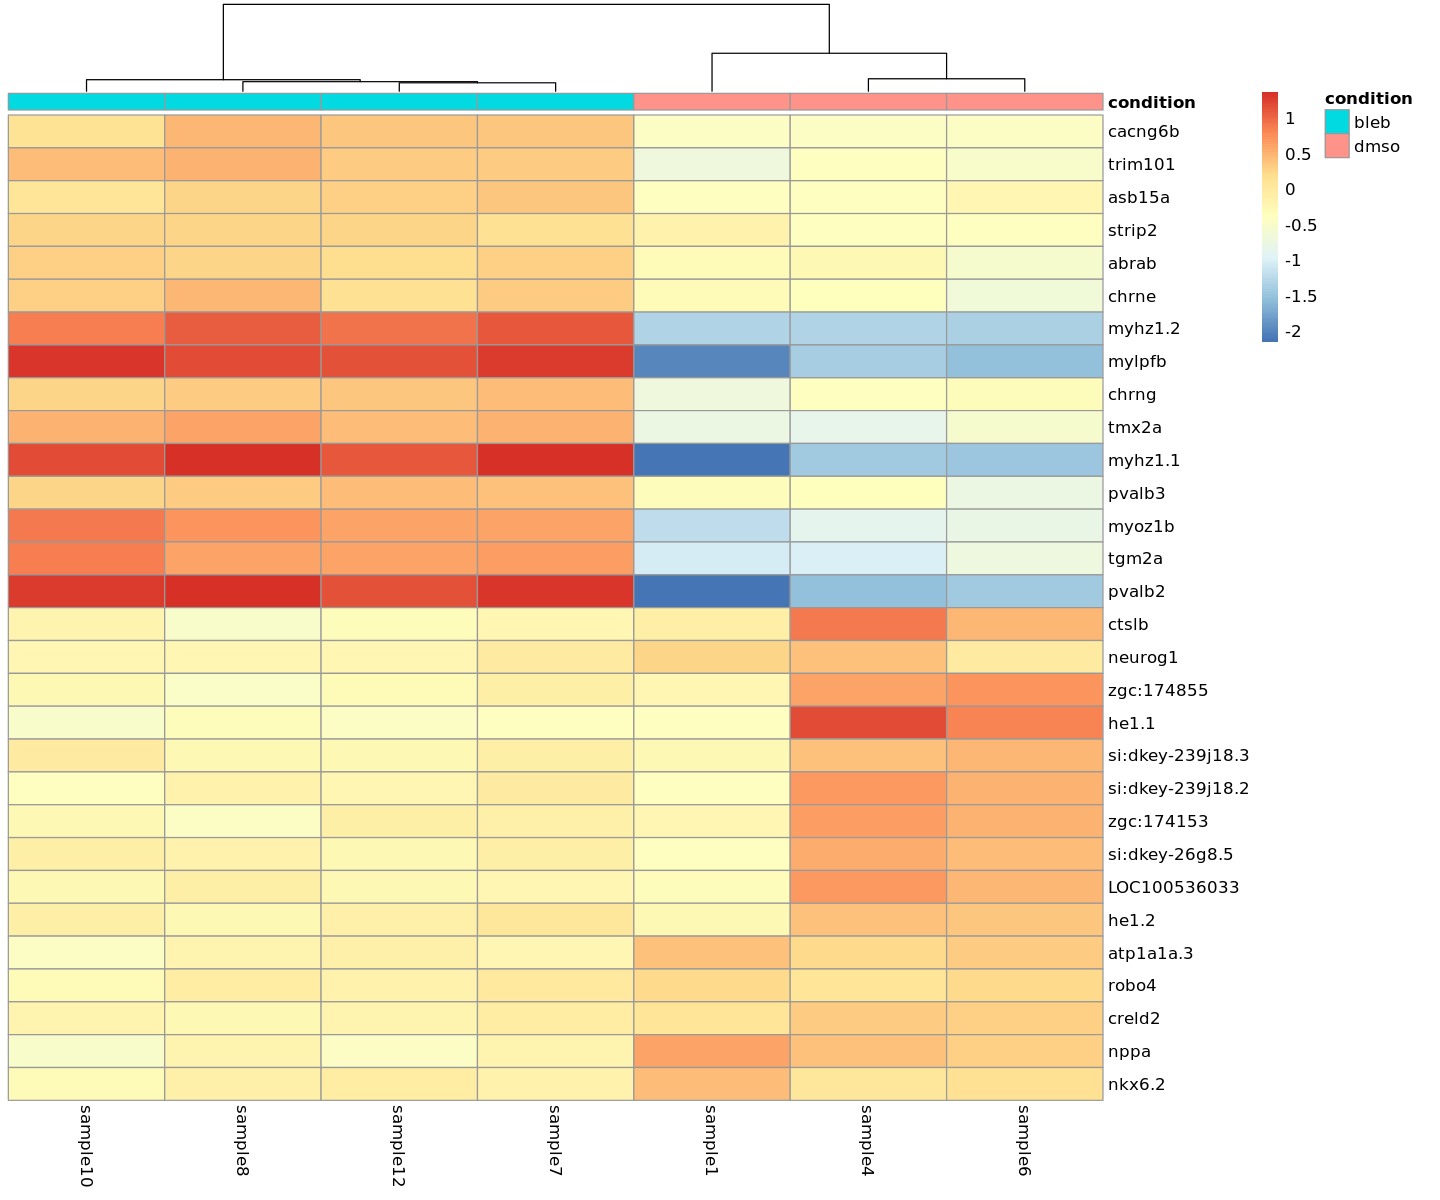

In [21]:
mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(blebdmso_samples)])
mat  <- mat - rowMeans(mat)
anno <- as.data.frame(colData(vsd)[rownames(blebdmso_samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
library(pheatmap)
labels_col = c(colData(vsd)[rownames(blebdmso_samples), "samplename"])
labels_row = c(topBotDEGenes$symbol)
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_outputs/topbot15heatmap_bleb_dmso.png")
pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = "deseq2_outputs/topbot15heatmap_bleb_dmso.pdf")

### Write out table with differentially expression genes 


In [8]:
resSigOrdered <- resSig[order(resSig$log2FoldChange),]
resSigOrderedDF <- as.data.frame(resSigOrdered)
head(resSigOrderedDF)
write.csv(resSigOrderedDF, file = "deseq2_outputs/results_bleb_dmso.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000039173,21.809366,-4.407818,0.7485384,-5.888566,3.895611e-09,2.107959e-07,ctslb,30443
ENSDARG00000056130,3.750471,-4.237091,1.3486832,-3.141651,1.679984e-03,2.449557e-02,neurog1,30239
ENSDARG00000094559,25.477421,-4.196739,0.9334490,-4.495948,6.926054e-06,2.056700e-04,zgc:174855,569326
ENSDARG00000023656,50.466237,-4.041910,0.7776728,-5.197444,2.020478e-07,8.374237e-06,he1.1,569018
ENSDARG00000089806,12.783689,-3.771487,0.9813090,-3.843322,1.213801e-04,2.575691e-03,si:dkey-239j18.3,100001785
ENSDARG00000095254,18.096682,-3.697167,1.0279745,-3.596555,3.224591e-04,6.170436e-03,si:dkey-239j18.2,321853


### select significant genes between vangl2 and wt
If I don't filter out samples with low counts, only get 1 DE gene

In [39]:
res_vangl2 <- results(dds, contrast=c("condition","vangl2","wt"))

In [40]:
sum(res_vangl2$padj < 0.1, na.rm=TRUE)

[1] 215

In [41]:
resSig_vangl2 <- subset(res_vangl2, padj < 0.1)
head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ])

log2 fold change (MLE): condition vangl2 vs wt 
Wald test p-value: condition vangl2 vs wt 
DataFrame with 6 rows and 6 columns
                    baseMean log2FoldChange     lfcSE      stat      pvalue
                   <numeric>      <numeric> <numeric> <numeric>   <numeric>
ENSDARG00000103837   27.5381        1.88385  0.576555   3.26742 1.08533e-03
ENSDARG00000012944  116.2318        1.56089  0.373247   4.18192 2.89062e-05
ENSDARG00000024433   57.5468        1.54554  0.473483   3.26418 1.09780e-03
ENSDARG00000042245 1018.6461        1.44320  0.375688   3.84150 1.22284e-04
ENSDARG00000022232   32.3999        1.40333  0.344897   4.06883 4.72505e-05
ENSDARG00000020890   49.1250        1.39447  0.461316   3.02280 2.50446e-03
                         padj
                    <numeric>
ENSDARG00000103837 0.03377006
ENSDARG00000012944 0.00211897
ENSDARG00000024433 0.03391415
ENSDARG00000042245 0.00697737
ENSDARG00000022232 0.00307255
ENSDARG00000020890 0.06409356

#### Annotate sig genes between vang and wt

In [42]:
ens.str <- substr(rownames(res_vangl2), 1, length(rownames(res_vangl2)))
res_vangl2$symbol <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="SYMBOL",
                     keytype="ENSEMBL",
                     multiVals="first")
res_vangl2$entrez <- mapIds(org.Dr.eg.db,
                     keys=ens.str,
                     column="ENTREZID",
                     keytype="ENSEMBL",
                     multiVals="first")

'select()' returned 1:many mapping between keys and columns

'select()' returned 1:many mapping between keys and columns



In [43]:
resSig_vangl2 <- subset(res_vangl2, padj < 0.1)
#head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 10)
#head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 10)

In [44]:
topBotDEGenes_vangl2<-rbind(head(resSig_vangl2[ order(-resSig_vangl2$log2FoldChange), ], 15),
                       head(resSig_vangl2[ order(resSig_vangl2$log2FoldChange), ], 15))

In [45]:
vangl2wt_samples<-colData(vsd)[vsd$condition == "vangl2" | vsd$condition == "wt",]

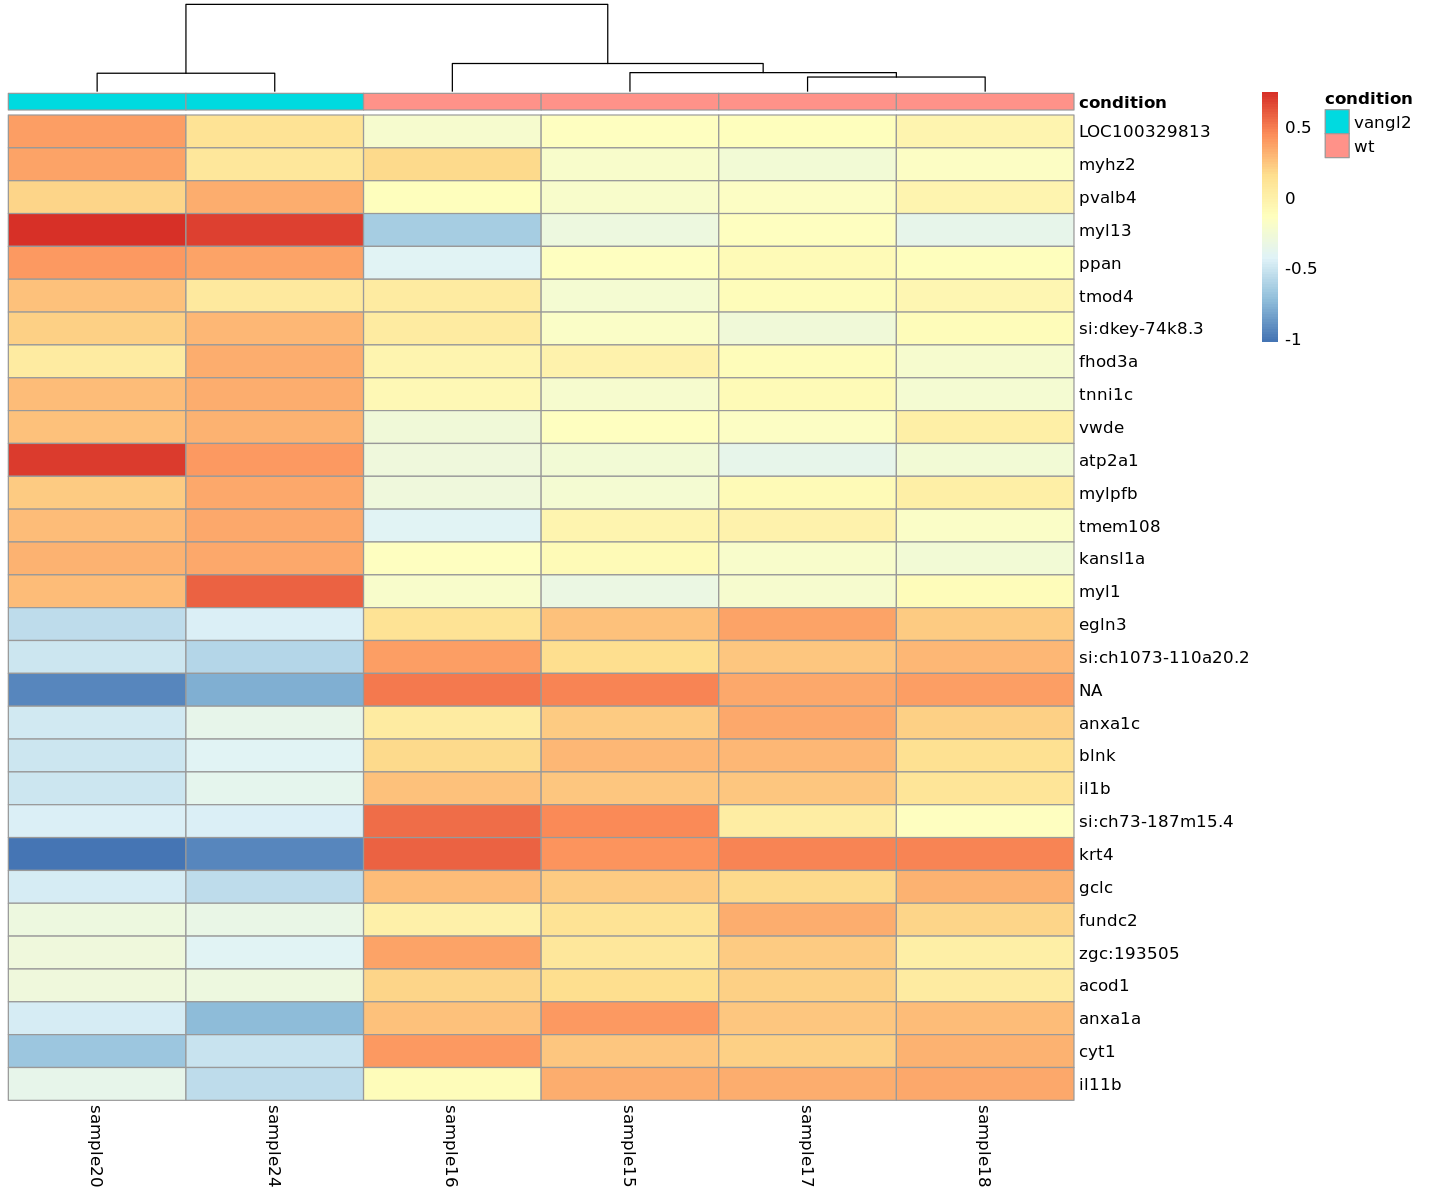

In [22]:
pretty_heatmap<-function(topBotDEGenes, samples, filename){
    mat<-(assay(vsd)[rownames(topBotDEGenes), rownames(samples)])
    mat  <- mat - rowMeans(mat)
    anno <- as.data.frame(colData(vsd)[rownames(samples), "condition", drop=FALSE]) # drop=FALSE allows you to select just one column of dataframe
    library(pheatmap)
    labels_col = c(colData(vsd)[rownames(samples), "samplename"])
    labels_row = c(topBotDEGenes$symbol)
    #pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE, filename = filename)
    pheatmap(mat, annotation_col = anno, labels_col = labels_col, labels_row = labels_row, cluster_rows=FALSE)
}

pretty_heatmap(topBotDEGenes_vangl2,vangl2wt_samples, "deseq2_outputs/topbot15heatmap_vangl2_wt.pdf")



In [47]:
### write results table

In [10]:
resSigOrdered_vangl2 <- resSig_vangl2[order(resSig_vangl2$log2FoldChange),]
resSigOrderedDF_vangl2 <- as.data.frame(resSigOrdered_vangl2)
head(resSigOrderedDF_vangl2)
write.csv(resSigOrderedDF_vangl2, file = "deseq2_outputs/results_vangl2_wt.csv")

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,symbol,entrez
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSDARG00000032553,49.40879,-3.240241,0.5967784,-5.429554,5.649495e-08,1.357448e-05,egln3,406602
ENSDARG00000092806,47.14578,-2.533757,0.4169227,-6.077284,1.222352e-09,5.874082e-07,si:ch1073-110a20.2,100538070
ENSDARG00000098602,134.34895,-1.977239,0.1922615,-10.284111,8.310500e-25,3.594291e-21,NA,NA
ENSDARG00000104359,21.15262,-1.871263,0.5505479,-3.398910,6.765505e-04,2.438401e-02,anxa1c,494158
ENSDARG00000042722,44.01362,-1.827878,0.3239258,-5.642891,1.672179e-08,4.520109e-06,blnk,405764
ENSDARG00000098700,27.21541,-1.687045,0.3715494,-4.540565,5.610357e-06,6.221742e-04,il1b,405770


## GO enrichment

In [26]:
library(topGO)
?topGO:new()

In [41]:
#make gene universe - all detected genes
geneList<-row.names(assay(vsd))

# make gene sel - topDE up or down genes
topBlebGenes<-row.names(resSigOrdered[resSigOrdered$log2FoldChange > 0,])

In [44]:
#dim(resSigOrdered[resSigOrdered$log2FoldChange > 0,])
?new

In [43]:
# working on it - need to sort annotation
goParams <- new("GOHyperGParams",
                geneIds = topBlebGenes,
                universeGeneIds = geneList,
                annotation ="org.Dr.eg.db" ,
                ontology = "MF",
                pvalueCutoff = 0.01,
                conditional = TRUE,
                testDirection = "over")
goResults <- hyperGTest(goParams)

ERROR: Error in getUniverseHelper(probes, datPkg, entrezIds): After filtering, there are no valid IDs that can be used as the Gene universe.
  Check input values to confirm they are the same type as the central ID used by your annotation package.
  For chip packages, this will still mean the central GENE identifier used by the package (NOT the probe IDs).


## save workspace

In [49]:
save.image(file = "DESeq2_notebook.RData")